In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [74]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [75]:
IMAGE_SIZE = [224, 224]
train_path = 'D:\\Finalyear\\train\*'
valid_path = 'D:\\Finalyear\\test\*'

In [76]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [77]:
for layer in inception.layers:
    layer.trainable = False

In [78]:

folders = glob(train_path)

In [79]:
folders

['D:\\Finalyear\\train\\Astrocitoma T1',
 'D:\\Finalyear\\train\\Astrocitoma T1C+',
 'D:\\Finalyear\\train\\Astrocitoma T2',
 'D:\\Finalyear\\train\\Carcinoma T1',
 'D:\\Finalyear\\train\\Carcinoma T1C+',
 'D:\\Finalyear\\train\\Carcinoma T2',
 'D:\\Finalyear\\train\\Ependimoma',
 'D:\\Finalyear\\train\\Ganglioglioma',
 'D:\\Finalyear\\train\\Germinoma T1C+',
 'D:\\Finalyear\\train\\Germinoma T2',
 'D:\\Finalyear\\train\\Glioblastoma T1',
 'D:\\Finalyear\\train\\Glioblastoma T2',
 'D:\\Finalyear\\train\\Glioma T2',
 'D:\\Finalyear\\train\\Granuloma T2',
 'D:\\Finalyear\\train\\Meningioma T1C',
 'D:\\Finalyear\\train\\Meningioma T1C+',
 'D:\\Finalyear\\train\\Neurocitoma T1',
 'D:\\Finalyear\\train\\Neurocitoma T1C',
 'D:\\Finalyear\\train\\Neurocitoma T2',
 'D:\\Finalyear\\train\\Oligodendroglioma T2',
 'D:\\Finalyear\\train\\Outros Tipos de Lesões T1',
 'D:\\Finalyear\\train\\Outros Tipos de Lesões T1C',
 'D:\\Finalyear\\train\\Outros Tipos de Lesões T2',
 'D:\\Finalyear\\train\\Papil

In [80]:
x = Flatten()(inception.output)

In [81]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [82]:
prediction

<KerasTensor: shape=(None, 28) dtype=float32 (created by layer 'dense_2')>

In [83]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 111, 111, 32  96         ['conv2d_8[0][0]']               
 rmalization)                   )                                                           

In [84]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [86]:
training_set = train_datagen.flow_from_directory('D:\\Finalyear\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 5339 images belonging to 28 classes.


In [87]:
test_set = test_datagen.flow_from_directory('D:\\Finalyear\\test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',shuffle=False)

Found 280 images belonging to 28 classes.


In [88]:
test_set.filenames

['Astrocitoma T1\\0c14dccd685d7ce330d14fa7a1f53dc756e73aff2f03afc1b09a7efc410f1804_big_gallery.jpeg',
 'Astrocitoma T1\\1b829d504373126112d3a30ca488a6_big_gallery.jpeg',
 'Astrocitoma T1\\1c0238417532d40ffca1c260427b39_big_gallery.jpeg',
 'Astrocitoma T1\\1d0f25e228a7078503a9f0c97ea738c5eed46c3de3dc3215b60c8add9aa77a62_big_gallery.jpeg',
 'Astrocitoma T1\\1ddfe350879837a569a4dc3c4a8aad07b0894e57aff90f0f3e4d80b47ff818dc_big_gallery.jpeg',
 'Astrocitoma T1\\1e954d53fb29f566bd2139bd7ab62c_big_gallery.jpeg',
 'Astrocitoma T1\\2b3807ee746d48e1ef3e694198c6eb19c41303f767b0da46365c6812911a17ed_big_gallery.jpeg',
 'Astrocitoma T1\\3a5be5d34a857fe9a4ce1e7dc03779_big_gallery.jpeg',
 'Astrocitoma T1\\3b964803d1f2f56863ed34328867ef6c048592cbad014c82c6ff128deabedf64_big_gallery.jpeg',
 'Astrocitoma T1\\3cb4d3297725622308b79ef3cae91a_big_gallery.jpeg',
 'Astrocitoma T1C+\\0efabbe6953569fb6ee340fe69ae51368cc5feb5eb9e9634a61d4337a6f41d27_big_gallery.jpeg',
 'Astrocitoma T1C+\\1f1291f56ed59c15a34e1d62d4

In [89]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
334/334 [==============================] - 252s 740ms/step - loss: 8.3745 - accuracy: 0.5984 - val_loss: 4.8037 - val_accuracy: 0.6964
Epoch 2/30
334/334 [==============================] - 163s 487ms/step - loss: 5.7523 - accuracy: 0.7239 - val_loss: 10.1835 - val_accuracy: 0.6643
Epoch 3/30
334/334 [==============================] - 161s 480ms/step - loss: 5.2521 - accuracy: 0.7520 - val_loss: 7.3294 - val_accuracy: 0.7250
Epoch 4/30
334/334 [==============================] - 173s 519ms/step - loss: 4.8207 - accuracy: 0.7833 - val_loss: 3.9491 - val_accuracy: 0.7929
Epoch 5/30
334/334 [==============================] - 162s 484ms/step - loss: 4.9816 - accuracy: 0.7818 - val_loss: 4.6892 - val_accuracy: 0.8000
Epoch 6/30
334/334 [==============================] - 169s 506ms/step - loss: 4.3102 - accuracy: 0.8118 - val_loss: 4.3189 - val_accuracy: 0.8071
Epoch 7/30
334/334 [==============================] - 162s 483ms/step - loss: 4.9772 - accuracy: 0.8071 - val_loss: 2.6702 

In [90]:
import matplotlib.pyplot as plt

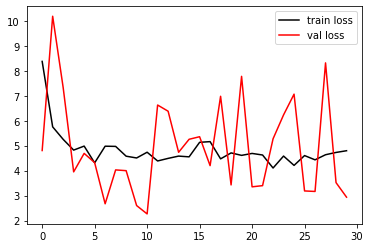

<Figure size 432x288 with 0 Axes>

In [91]:
plt.plot(r.history['loss'], label='train loss',color="black")
plt.plot(r.history['val_loss'], label='val loss',color="red")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')




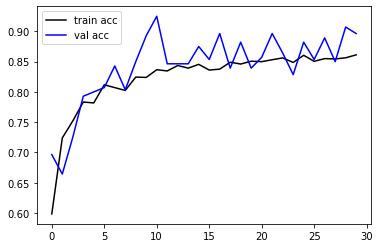

<Figure size 432x288 with 0 Axes>

In [92]:
plt.plot(r.history['accuracy'], label='train acc',color="black")
plt.plot(r.history['val_accuracy'], label='val acc',color="blue")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [93]:

from tensorflow.keras.models import load_model
model.save('model_inceptionv3t1.h5')


In [94]:
model=load_model('model_inceptionv3t1.h5')

In [95]:
y_pred = model.predict(test_set)
y_pred

18/18 [==============================] - 13s 544ms/step


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [96]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  6,  2,  2,  2, 18,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 22,
        5,  5,  5, 18,  5, 22,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 22, 11, 11, 11, 19,
       11, 12,  2, 19, 19,  2, 12,  2,  2,  2,  2, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 12, 19, 19, 19,  2, 19, 19, 12, 19, 12, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [97]:
import os
path ='D:\\Finalyear\\test'
Diseases_types=os.listdir(path)

In [98]:
diseases = []
for i in Diseases_types:
  all_images = os.listdir(path + '/' +i)

  for j in all_images :
    diseases.append((i))
    print (diseases)

['Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']
['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1']


In [99]:
diseases

['Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1C+',
 'Astrocitoma T1C+',
 'Astrocitoma T1C+',
 'Astrocitoma T1C+',
 'Astrocitoma T1C+',
 'Astrocitoma T1C+',
 'Astrocitoma T1C+',
 'Astrocitoma T1C+',
 'Astrocitoma T1C+',
 'Astrocitoma T1C+',
 'Astrocitoma T2',
 'Astrocitoma T2',
 'Astrocitoma T2',
 'Astrocitoma T2',
 'Astrocitoma T2',
 'Astrocitoma T2',
 'Astrocitoma T2',
 'Astrocitoma T2',
 'Astrocitoma T2',
 'Astrocitoma T2',
 'Carcinoma T1',
 'Carcinoma T1',
 'Carcinoma T1',
 'Carcinoma T1',
 'Carcinoma T1',
 'Carcinoma T1',
 'Carcinoma T1',
 'Carcinoma T1',
 'Carcinoma T1',
 'Carcinoma T1',
 'Carcinoma T1C+',
 'Carcinoma T1C+',
 'Carcinoma T1C+',
 'Carcinoma T1C+',
 'Carcinoma T1C+',
 'Carcinoma T1C+',
 'Carcinoma T1C+',
 'Carcinoma T1C+',
 'Carcinoma T1C+',
 'Carcinoma T1C+',
 'Carcinoma T2',
 'Carcinoma T2',
 'Carcinoma T2',

In [100]:
from sklearn.preprocessing import LabelEncoder
diseases = np.array(diseases)
diseases.reshape(280,-1)
y_labelencoder = LabelEncoder()



In [101]:
diseases

array(['Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1',
       'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1',
       'Astrocitoma T1', 'Astrocitoma T1', 'Astrocitoma T1',
       'Astrocitoma T1', 'Astrocitoma T1C+', 'Astrocitoma T1C+',
       'Astrocitoma T1C+', 'Astrocitoma T1C+', 'Astrocitoma T1C+',
       'Astrocitoma T1C+', 'Astrocitoma T1C+', 'Astrocitoma T1C+',
       'Astrocitoma T1C+', 'Astrocitoma T1C+', 'Astrocitoma T2',
       'Astrocitoma T2', 'Astrocitoma T2', 'Astrocitoma T2',
       'Astrocitoma T2', 'Astrocitoma T2', 'Astrocitoma T2',
       'Astrocitoma T2', 'Astrocitoma T2', 'Astrocitoma T2',
       'Carcinoma T1', 'Carcinoma T1', 'Carcinoma T1', 'Carcinoma T1',
       'Carcinoma T1', 'Carcinoma T1', 'Carcinoma T1', 'Carcinoma T1',
       'Carcinoma T1', 'Carcinoma T1', 'Carcinoma T1C+', 'Carcinoma T1C+',
       'Carcinoma T1C+', 'Carcinoma T1C+', 'Carcinoma T1C+',
       'Carcinoma T1C+', 'Carcinoma T1C+', 'Carcinoma T1C+',
       'Carcinoma T1C+', 'Carci

In [102]:
y_test = y_labelencoder.fit_transform (diseases)
y_test = np.array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27])

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       0.53      0.80      0.64        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.70      0.82        10
           6       0.91      1.00      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      0.80      0.89        10
          12       0.40      0.20      0.27        10
          13       1.00      1.00      1.00        10
          14       0.50      1.00      0.67        10
          15       0.00      0.00      0.00        10
          16       1.00      1.00      1.00        10
          17       1.00    

D:\Annaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Annaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Annaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8714833059660646

In [106]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average='micro')

0.8964285714285715

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8964285714285715

In [108]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='micro')

0.8964285714285714

In [109]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,average='micro')

0.8964285714285715

In [110]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [111]:
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Astrocitoma T1','Astrocitoma T1C+', 'Carcinoma T1', 'Carcinoma T1C+','Carcinoma T2', 'Ependimoma', 'Ganglioglioma', 'Glioblastoma T1', 'Glioma T2', 'Glioma T2', 'Glioma T2','Granuloma T2', 
        'Meningioma T1C', 'Meningioma T1C+', 'Neurocitoma T1', 'Neurocitoma T1C', 'Neurocitoma T2','Oligodendroglioma T2','Outros Tipos de Lesões T1', 'Outros Tipos de Lesões T1C','Outros Tipos de Lesões T2','Papiloma T1C+', 'Papiloma T1C+', 'pituitary',
       'Schwannoma T1', 'Schwannoma T1', 'Schwannoma T1C', 'Stroke'], 
                     columns = ['Astrocitoma T1','Astrocitoma T1C+', 'Carcinoma T1', 'Carcinoma T1C+','Carcinoma T2', 'Ependimoma', 'Ganglioglioma', 'Glioblastoma T1', 'Glioma T2', 'Glioma T2', 'Glioma T2','Granuloma T2', 
        'Meningioma T1C', 'Meningioma T1C+', 'Neurocitoma T1', 'Neurocitoma T1C', 'Neurocitoma T2','Oligodendroglioma T2','Outros Tipos de Lesões T1', 'Outros Tipos de Lesões T1C','Outros Tipos de Lesões T2','Papiloma T1C+', 'Papiloma T1C+', 'pituitary',
       'Schwannoma T1', 'Schwannoma T1', 'Schwannoma T1C', 'Stroke'])

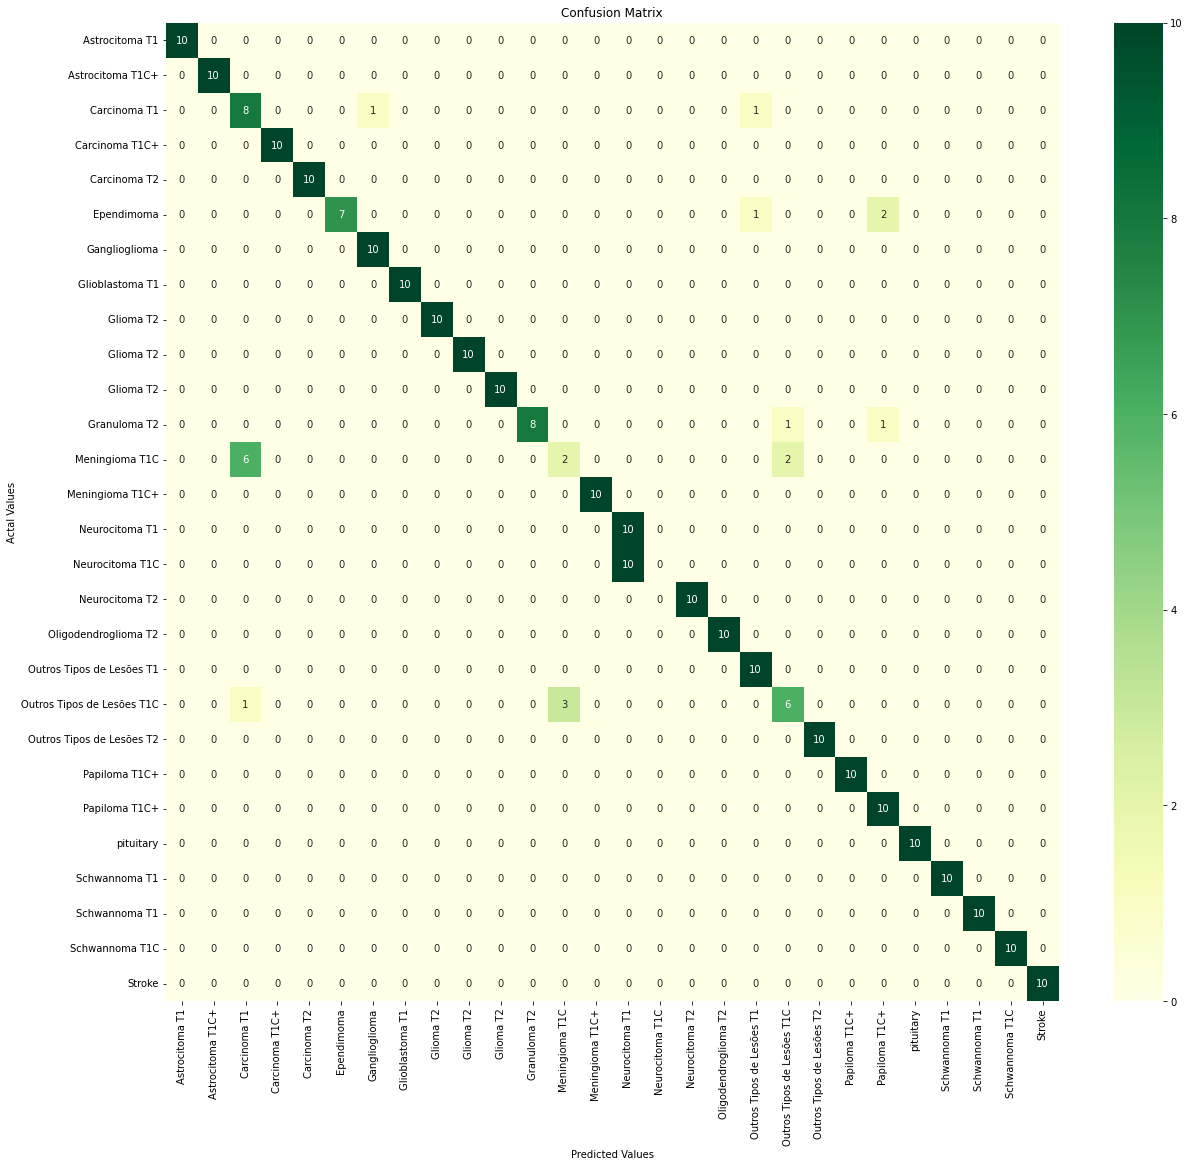

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,18))
custom_cmap = sns.color_palette("YlGn", as_cmap=True)
sns.heatmap(cm_df, annot=True, cmap=custom_cmap)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [113]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [114]:
img=image.load_img('D:\\Finalyear\\Neurocitomat1ctest.jpeg',target_size=(224,224))

In [115]:
x=image.img_to_array(img)
x

array([[[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.],
        ...,
        [4., 4., 4.],
        [4., 4., 4.],
        [3., 3., 3.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.],
        ...,
        [4., 4., 4.],
        [4., 4., 4.],
        [3., 3., 3.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.],
        ...,
        [4., 4., 4.],
        [4., 4., 4.],
        [3., 3., 3.]],

       ...,

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.],
        ...,
        [4., 4., 4.],
        [4., 4., 4.],
        [3., 3., 3.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.],
        ...,
        [4., 4., 4.],
        [5., 5., 5.],
        [3., 3., 3.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.],
        ...,
        [4., 4., 4.],
        [4., 4., 4.],
        [3., 3., 3.]]], dtype=float32)

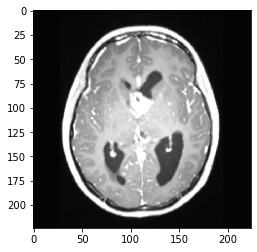

In [116]:
from matplotlib.pyplot import imshow
imshow(img)

In [117]:
x=x/255

In [118]:
x


array([[[0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        ...,
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01176471, 0.01176471, 0.01176471]],

       [[0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        ...,
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01176471, 0.01176471, 0.01176471]],

       [[0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        ...,
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01176471, 0.01176471, 0.01176471]],

       ...,

       [[0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0

In [119]:
import cv2
x = cv2.resize(x,(224,224)) 
x = x.reshape(1,224,224,3) 

In [120]:
x.shape

(1, 224, 224, 3)

In [121]:
model.predict(x)

1/1 [==============================] - 8s 8s/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [122]:
a=model.predict(x)

1/1 [==============================] - 0s 105ms/step


In [123]:
a.argmax()

17

In [124]:
folders

['D:\\Finalyear\\train\\Astrocitoma T1',
 'D:\\Finalyear\\train\\Astrocitoma T1C+',
 'D:\\Finalyear\\train\\Astrocitoma T2',
 'D:\\Finalyear\\train\\Carcinoma T1',
 'D:\\Finalyear\\train\\Carcinoma T1C+',
 'D:\\Finalyear\\train\\Carcinoma T2',
 'D:\\Finalyear\\train\\Ependimoma',
 'D:\\Finalyear\\train\\Ganglioglioma',
 'D:\\Finalyear\\train\\Germinoma T1C+',
 'D:\\Finalyear\\train\\Germinoma T2',
 'D:\\Finalyear\\train\\Glioblastoma T1',
 'D:\\Finalyear\\train\\Glioblastoma T2',
 'D:\\Finalyear\\train\\Glioma T2',
 'D:\\Finalyear\\train\\Granuloma T2',
 'D:\\Finalyear\\train\\Meningioma T1C',
 'D:\\Finalyear\\train\\Meningioma T1C+',
 'D:\\Finalyear\\train\\Neurocitoma T1',
 'D:\\Finalyear\\train\\Neurocitoma T1C',
 'D:\\Finalyear\\train\\Neurocitoma T2',
 'D:\\Finalyear\\train\\Oligodendroglioma T2',
 'D:\\Finalyear\\train\\Outros Tipos de Lesões T1',
 'D:\\Finalyear\\train\\Outros Tipos de Lesões T1C',
 'D:\\Finalyear\\train\\Outros Tipos de Lesões T2',
 'D:\\Finalyear\\train\\Papil